In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np
from tkinter import Tk
from tkinter.filedialog import askdirectory
path = askdirectory(title='Select Folder') # shows dialog box and return the path
os.path.abspath(path)
files = glob.glob(os.path.join(path, "*.csv"))
path1 = os.path.basename(os.path.normpath(path))

dataframe_list = []
#note, for naming. The file (aggregate freq/amp, waveform) data should be pretty concise. The waveform by itself should be named plainly (like 0.5) because it will be in its own folder and analyzed
#waveform data should be aggregated together (like ratio) and put into one folder for the entire system. 
for path, dirs, files in os.walk(path):
    print("Path:", path)

    print ("\nDirs:")
    for d in dirs:
        print ('\t'+d)

    
        
    print ("\nFiles:")  


    for f in files:
        
        #filename = os.path.basename(f).split('.')[0] + "." + os.path.basename(f).split('.')[1]
        #strain = filename.split('-')[0].replace("%","")
        
        if(f.endswith('.csv')) :
            
            #NEED A WAY TO GET FREQUENCY
            fullfile = path +"/" +f#+".csv"
            if(fullfile.endswith('.csv')):
                pass
            else:
                fullfile += ".csv"
            fullfile = path +"/" +f#+".csv"
            print(fullfile)
            #data splitting
            name_data = f.split('_')
            wt_percent = int(name_data[0][0])
            raw_strain = float(name_data[1].replace(".csv", "").replace("xyz","0.1").replace("strain","").replace("_save", ""))
            
            
           #opendataframe
        
            dataframe1 = pd.read_csv(fullfile)
            dataframe1["strain"] = raw_strain
            dataframe1["wt_percent"] = wt_percent
            
            dataframe_list.append(dataframe1)
            print(dataframe1.size)
            
            
            

            
            #plotData(data1,name, n)
           
                


    
        
        
        
        
    print("Finished for loop")
       

        
        
    print ("----")
full_df = pd.concat(dataframe_list).reset_index()
print(full_df)


Path: C:/Users/Himendra/Documents/Code/ConfocalImageAnalysis/ConfocalShearAnalysis/data/AmplitudeSweeps/AmplitudeSweeps_ParticleData/FinalData

Dirs:

Files:
C:/Users/Himendra/Documents/Code/ConfocalImageAnalysis/ConfocalShearAnalysis/data/AmplitudeSweeps/AmplitudeSweeps_ParticleData/FinalData/2percent_1000strain_save.csv
16056
C:/Users/Himendra/Documents/Code/ConfocalImageAnalysis/ConfocalShearAnalysis/data/AmplitudeSweeps/AmplitudeSweeps_ParticleData/FinalData/2percent_100strain_save.csv
15496
C:/Users/Himendra/Documents/Code/ConfocalImageAnalysis/ConfocalShearAnalysis/data/AmplitudeSweeps/AmplitudeSweeps_ParticleData/FinalData/2percent_10strain_save.csv
18808
C:/Users/Himendra/Documents/Code/ConfocalImageAnalysis/ConfocalShearAnalysis/data/AmplitudeSweeps/AmplitudeSweeps_ParticleData/FinalData/2percent_1strain_save.csv
17864
C:/Users/Himendra/Documents/Code/ConfocalImageAnalysis/ConfocalShearAnalysis/data/AmplitudeSweeps/AmplitudeSweeps_ParticleData/FinalData/2percent_200strain_save

   strain  radius_bin  index_sum  Unnamed: 0_sum  radius_sum  x_sum  y_sum  \
0     1.0  [0.0, 0.5)          0               0         0.0    0.0    0.0   
1     1.0  [0.5, 1.0)          0               0         0.0    0.0    0.0   
2     1.0  [1.0, 1.5)          0               0         0.0    0.0    0.0   
3     1.0  [1.5, 2.0)          0               0         0.0    0.0    0.0   
4     1.0  [2.0, 2.5)          0               0         0.0    0.0    0.0   

   z_sum  neighbors_sum  wt_percent_sum  ...  radius_mean  x_mean  y_mean  \
0    0.0              0               0  ...          NaN     NaN     NaN   
1    0.0              0               0  ...          NaN     NaN     NaN   
2    0.0              0               0  ...          NaN     NaN     NaN   
3    0.0              0               0  ...          NaN     NaN     NaN   
4    0.0              0               0  ...          NaN     NaN     NaN   

   z_mean  neighbors_mean  wt_percent_mean  logstrain_mean  ratio_me

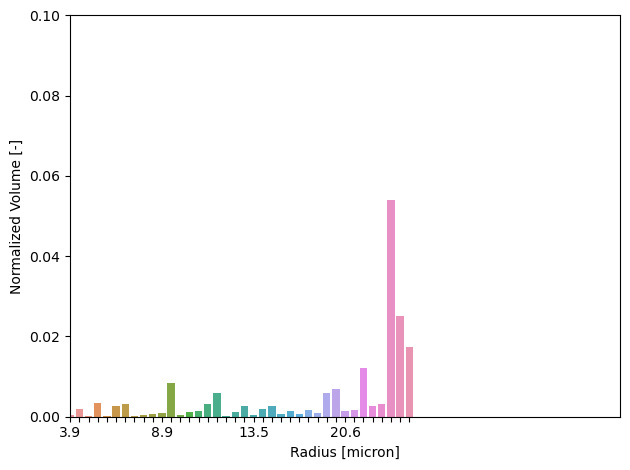

10.0


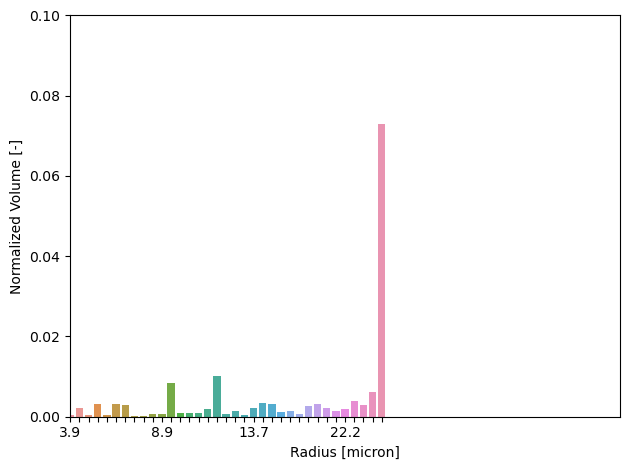

20.0


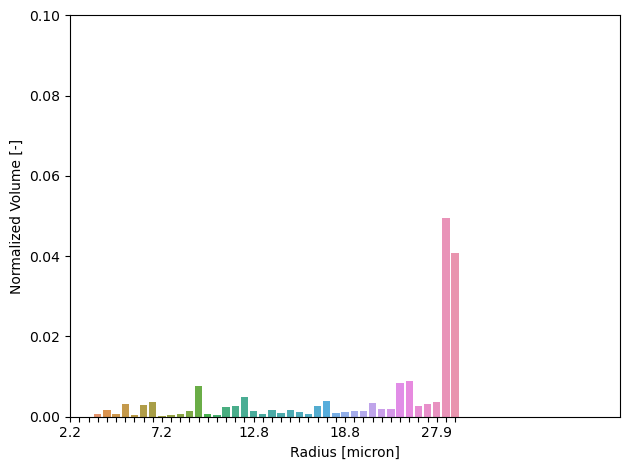

40.0


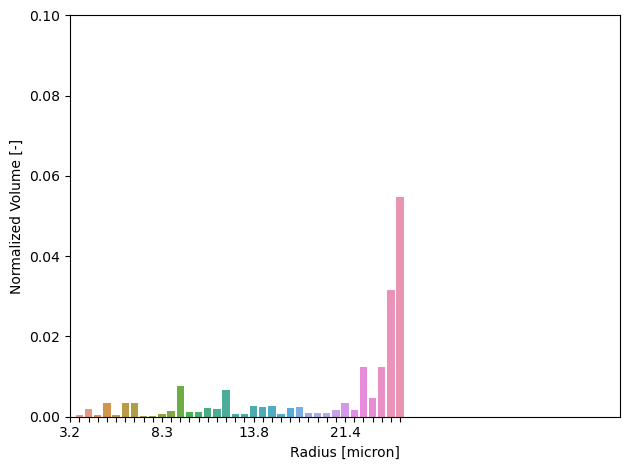

50.0


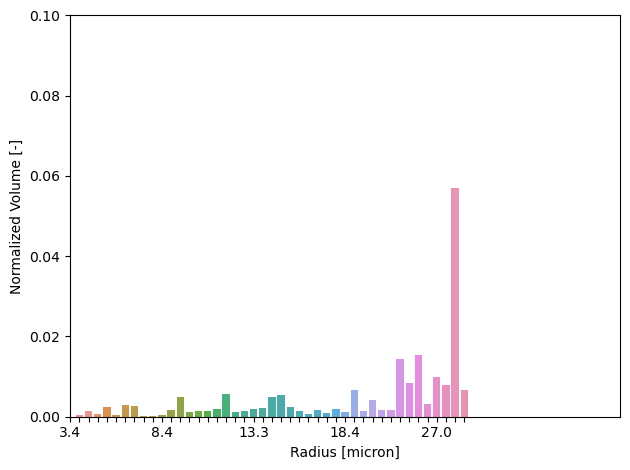

63.0


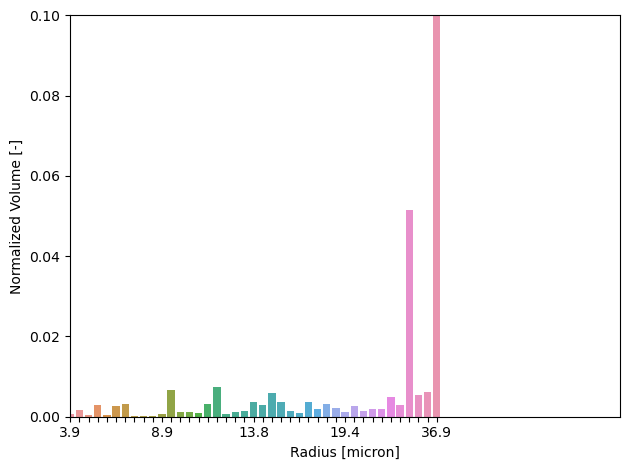

100.0


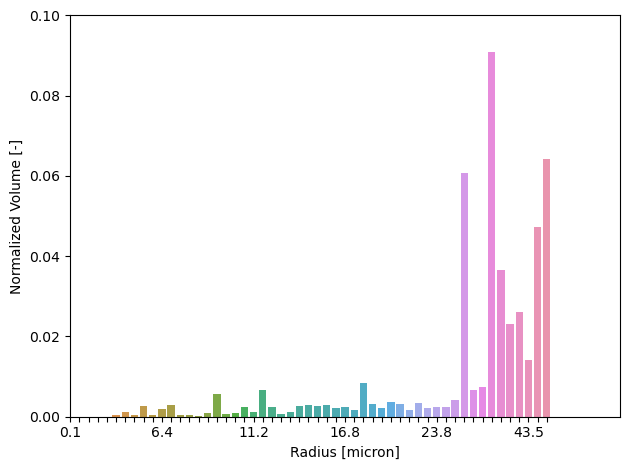

200.0


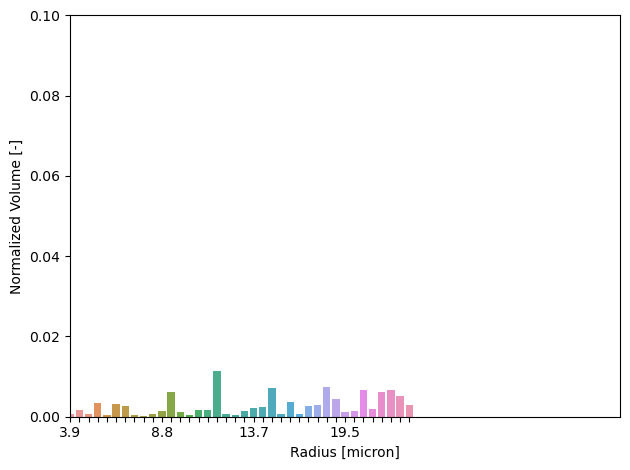

630.0


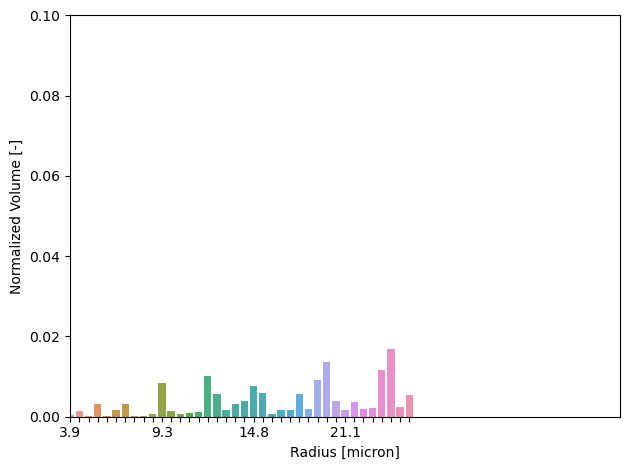

1000.0


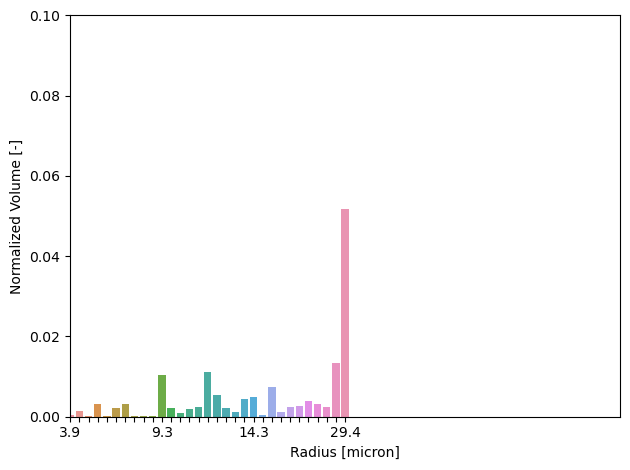

       index  Unnamed: 0     radius           x           y           z  \
121      121         265  13.584352  250.092878  294.695068   61.989274   
123      123         268   4.358468   58.090059  216.751211   50.017446   
124      124         269   4.627321  116.878945  294.780919   50.090336   
126      126         271   3.996692  240.970757  110.854302   50.956435   
128      128         275   3.977943  267.908000  169.002384   51.923894   
...      ...         ...        ...         ...         ...         ...   
21002   2033        2745  15.059441  190.629765  125.329158  118.107517   
21007   2038        2750  15.759413  126.765021   63.224321  133.404823   
21008   2039        2751  14.955498  208.383296   74.276268  147.618059   
21009   2040        2752  14.771609   80.204246  240.166158  148.348910   
21013   2044        2759  18.899901  272.066255   52.364490  132.146963   

       neighbors  strain  wt_percent  logstrain     ratio  logradius  \
121           10  1000.0   

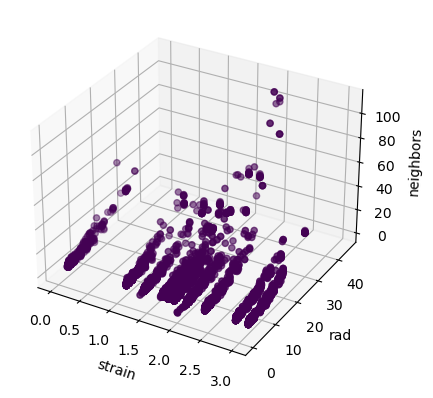

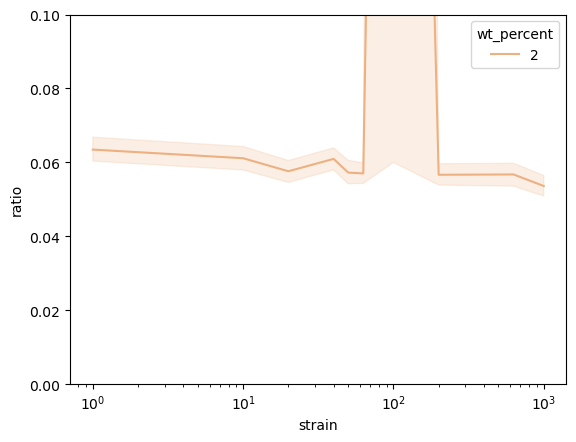

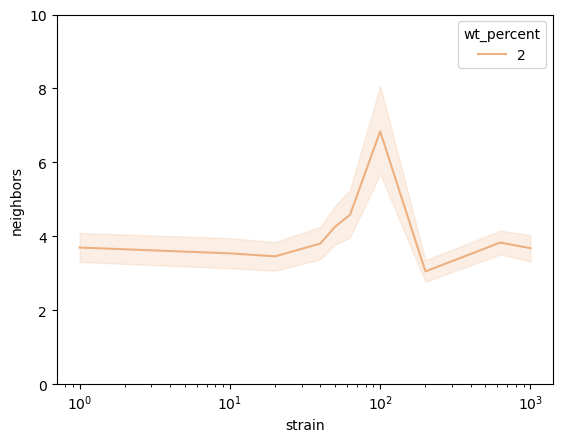

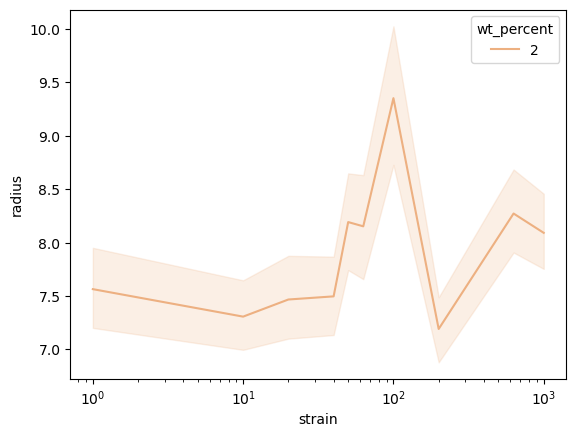

In [91]:
import matplotlib.colors as mcolors
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
full_df = full_df[full_df["strain"]>0]
full_df = full_df[full_df["x"]<300]
full_df = full_df[full_df["x"]>50]

full_df = full_df[full_df["y"]<300]
full_df = full_df[full_df["y"]>50 ]

full_df = full_df[full_df["z"]>50]
full_df = full_df[full_df["z"]<150]

full_df = full_df[full_df["radius"]<50]
full_df = full_df[full_df["radius"]>0]


full_df = full_df[full_df["wt_percent"]==2]
full_df['logradius'] = np.log10(full_df['radius'])
full_df['volume'] = 4/3*3.14*full_df['radius']**3 


strains = full_df['strain'].unique()

for strain in strains:
    break
    full_df1 = full_df[full_df["strain"]==strain]
    
    a1 = sns.histplot(data = full_df1, x = "radius", bins = 30)
    a1.set(xlim = (0,40), ylim=(0,250))
    plt.savefig("./data/AmplitudeSweeps/Figures/"+str(strain)+".png")
    
    plt.show()


    
    
# Create bins with a specified width
bin_width = 0.5
# Calculate the maximum bin edge as the nearest upper multiple of bin_width
max_bin_edge = np.ceil(full_df['radius'].max() / bin_width) * bin_width
# Create an array of bin edges from 0 to max_bin_edge with a step of bin_width
bins = np.arange(0, max_bin_edge + bin_width, bin_width)

# Bin the data using pd.cut
full_df['radius_bin'] = pd.cut(full_df['radius'], bins=bins, include_lowest=True, right=False)

# Calculate summary statistics for each bin
summary_data = full_df.groupby([ "strain",'radius_bin']).sum().reset_index()
summary_data_2 = full_df.groupby([ "strain",'radius_bin']).mean().reset_index()  

# Rename columns in summary_data to append '_sum'
summary_data = summary_data.rename(columns={col: f'{col}_sum' for col in summary_data.columns if col not in ['strain', 'radius_bin']})

# Rename columns in summary_data_2 to append '_mean'
summary_data_2 = summary_data_2.rename(columns={col: f'{col}_mean' for col in summary_data_2.columns if col not in ['strain', 'radius_bin']})

# Step 2: Merge DataFrames on 'radius_bin'
combined_data = pd.merge(summary_data, summary_data_2,on=['strain', 'radius_bin'])

print(combined_data.head())
combined_data = combined_data.dropna()
combined_data['radius_mean'] = pd.to_numeric(combined_data['radius_mean'], errors='coerce')
combined_data['radius_mean'].fillna(0, inplace=True)
combined_data['radius_mean'] = combined_data['radius_mean'].astype(float)

combined_data["normalizedVolume"] = combined_data["volume_sum"]/(201*350*350)
combined_data['radius_mean'] = np.round(combined_data['radius_mean'],1)


#combined_data["radius_mean"] = float(combined_data["radius_mean"])
    
strains = combined_data['strain'].unique()
    
for strain in strains:
    print(strain)
    combined_data1 = combined_data[combined_data["strain"]==strain]
    
    a1 = sns.barplot(data = combined_data1, x = "radius_mean", y = "normalizedVolume")


    a1.set(xlim = (0,60), ylim = (0,0.1))
    # Select every Nth label to display
    n = 10  # Adjust based on your needs
    for index, label in enumerate(a1.xaxis.get_ticklabels()):
        if index % n != 0:
            label.set_visible(False)
    a1.set(xlabel ="Radius [micron]", ylabel = "Normalized Volume [-]")
    plt.tight_layout()
    plt.savefig("./data/AmplitudeSweeps/Figures/"+"hist"+str(strain)+".png")

    plt.show()    
    
    
    
    
    
    
    
    
    
    
    
    



full_df['logstrain'] = np.log10(full_df['strain'])


print(full_df)


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(full_df["logstrain"] , full_df["radius"], full_df["neighbors"] , c = full_df["wt_percent"])

#X, Y = np.meshgrid(x_range, y_range)
#Z = Model.ev(X,Y)
#ax.plot_surface(X,Y,Z, color='red', alpha=0.5)

ax.set_xlabel('strain')
ax.set_ylabel('rad')
ax.set_zlabel('neighbors')
plt.show()

full_df["ratio"] = full_df["neighbors"]/full_df["radius"]**2
a1 = sns.lineplot(data = full_df, x = "strain", y = "ratio",  hue = "wt_percent",palette = "flare")
a1.set(xscale='log')
a1.set(ylim = (0,0.1))



plt.show()

a1 = sns.lineplot(data = full_df, x = "strain", y = "neighbors",  hue = "wt_percent",palette = "flare")
a1.set(xscale='log')
a1.set(ylim = (0,10))

plt.savefig("neighbors.png", format = 'png', dpi = 800)
plt.show()

a1 = sns.lineplot(data = full_df, x = "strain", y = "radius",  hue = "wt_percent",palette = "flare")
a1.set(xscale='log')



plt.show()


